<a href="https://colab.research.google.com/github/alyahusnachoirunnisa/Cat-and-dog-image-classification-MobleNetV2/blob/main/Cat_and_Dog_Image_Classification_MobileNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import os
from zipfile import ZipFile

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mping
import cv2
import glob

from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
import tensorflow as tf
import tensorflow_hub as hub

# Download and Extract Dataset

## Download Dataset using Kaggle API

In [ ]:
# Installing the kaggle library
!pip install kaggle

In [ ]:
# membuat directory kaggle di root
!mkdir -p ~/.kaggle

# copy file kaggle.json ke directory kaggle
!cp /content/drive/MyDrive/Dataset/kaggle.json ~/.kaggle

# mengatur izin file kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# import kaggle dataset
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


## Extracting Dataset

In [ ]:
!ls

dogs-vs-cats.zip  resized_images  sampleSubmission.csv	train
drive		  sample_data	  test1.zip		train.zip


In [ ]:
# extracting the conpressed dataset
zip_dir = '/content/dogs-vs-cats.zip'

with ZipFile(zip_dir, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

dogs-vs-cats.zip  resized_images  sampleSubmission.csv	train
drive		  sample_data	  test1.zip		train.zip


In [ ]:
# extracting train.zip dataset
train_zip_dir = '/content/train.zip'

with ZipFile(train_zip_dir, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
# counting the number of files in train folder
train_path = '/content/train'

path, dirs, files = next(os.walk(train_path))
file_count = len(files)
print("Number of images:", file_count)

Number of images: 25000


In [ ]:
len(os.listdir(train_path))

25000

In [ ]:
os.listdir(train_path)

['cat.7137.jpg',
 'dog.8920.jpg',
 'dog.2563.jpg',
 'cat.8318.jpg',
 'dog.4427.jpg',
 'dog.7821.jpg',
 'cat.6363.jpg',
 'cat.8556.jpg',
 'cat.2817.jpg',
 'dog.7932.jpg',
 'cat.299.jpg',
 'dog.8259.jpg',
 'dog.11483.jpg',
 'dog.5225.jpg',
 'dog.11289.jpg',
 'cat.10517.jpg',
 'dog.582.jpg',
 'cat.8391.jpg',
 'dog.3774.jpg',
 'dog.8145.jpg',
 'dog.1141.jpg',
 'cat.367.jpg',
 'cat.8141.jpg',
 'dog.10073.jpg',
 'cat.4994.jpg',
 'dog.2802.jpg',
 'cat.7877.jpg',
 'cat.7264.jpg',
 'dog.6710.jpg',
 'dog.3898.jpg',
 'dog.8086.jpg',
 'cat.5463.jpg',
 'dog.10380.jpg',
 'dog.6786.jpg',
 'cat.4321.jpg',
 'dog.7993.jpg',
 'cat.1148.jpg',
 'dog.7240.jpg',
 'cat.12001.jpg',
 'dog.3238.jpg',
 'dog.7461.jpg',
 'dog.6167.jpg',
 'dog.10368.jpg',
 'cat.11390.jpg',
 'cat.3276.jpg',
 'cat.6419.jpg',
 'dog.4032.jpg',
 'dog.5291.jpg',
 'dog.3431.jpg',
 'dog.11707.jpg',
 'cat.1428.jpg',
 'cat.4934.jpg',
 'dog.7220.jpg',
 'cat.11433.jpg',
 'dog.2135.jpg',
 'dog.5842.jpg',
 'dog.8362.jpg',
 'dog.4468.jpg',
 'dog.8

# Displaying Dog and Cat Images


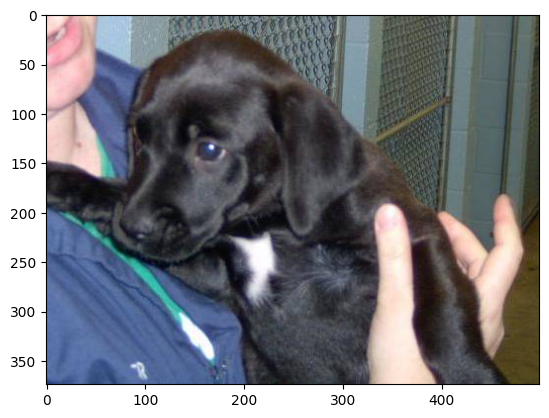

In [ ]:
# display dog image
dog_img_path = os.path.join(train_path, 'dog.2769.jpg')
img = mping.imread(dog_img_path)
plt.imshow(img)

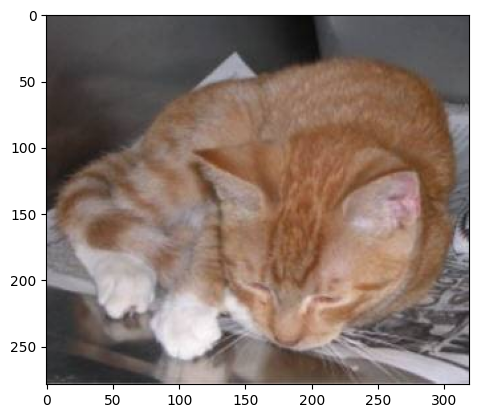

In [ ]:
# Display Cat Image
cat_img_path = os.path.join(train_path, 'cat.7606.jpg')
img = mping.imread(cat_img_path)
plt.imshow(img)

every image on the train_dir, has different size.

# Counting Dog and Cat Images

In [ ]:
file_names = os.listdir(train_path)
dog_img_list = []
cat_img_list = []

for img_name in file_names:
  if 'dog' in img_name:
    dog_img_list.append(img_name)
  if 'cat' in img_name:
    cat_img_list.append(img_name)

In [ ]:
print(f"the number of dog images: {len(dog_img_list)}")
print(f"the number of cat images: {len(cat_img_list)}")

the number of dog images: 12500
the number of cat images: 12500


# Data Preprocessing

## Resizing All the Images

In [ ]:
# Recreating a directory for resized images
resized_img_path = os.path.join('/content', 'resized_images')
os.mkdir(resized_img_path)

In [ ]:
# Resizing image and save to resized imange directory
for class_list in [dog_img_list, cat_img_list]:
  for idx in range(1000):
    img_name = class_list[idx]
    img_path = os.path.join(train_path, img_name)

    img = Image.open(img_path)
    img = img.resize((224,224))
    img = img.convert('RGB')

    new_img_path = os.path.join(resized_img_path, img_name)
    img.save(new_img_path)

In [ ]:
f"the number of image in resized images directory: {len(os.listdir(resized_img_path))}"

'the number of image in resized images directory: 2000'

In [ ]:
dog_img_count = 0
cat_img_count = 0

for img in os.listdir(resized_img_path):
  if "cat" in img:
    cat_img_count += 1
  elif "dog" in img:
    dog_img_count += 1

print("number of dog img:", dog_img_count)
print("number of cat img:", cat_img_count)

number of dog img: 1000
number of cat img: 1000


## Labeling Dog and Cat Images

In [ ]:
cat = 0
dog = 1
labels = []

for img in os.listdir(resized_img_path):
  if 'dog' in img:
    labels.append(dog)
  elif 'cat' in img:
    labels.append(cat)

In [ ]:
np.unique(labels, return_counts=True)

(array([0, 1]), array([1000, 1000]))

## Visualize Images and Labels

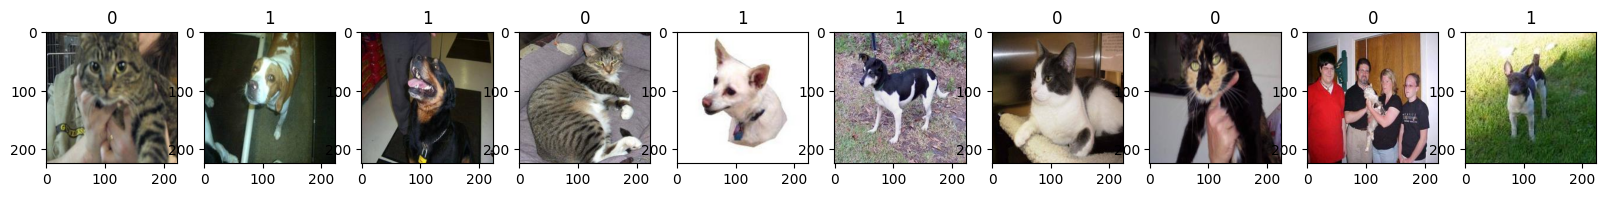

In [ ]:
fig, ax = plt.subplots(ncols=10, figsize=(20,20))
for idx, img_name in enumerate(os.listdir(resized_img_path)[:10]):
  img_path = os.path.join(resized_img_path, img_name)
  img = mping.imread(img_path)
  ax[idx].imshow(img)
  ax[idx].title.set_text(labels[idx])

# Convert Images to Numpy Array

In [ ]:
# finding images with extension on the list and put it on the files list
image_directory = "/content/resized_images/"
image_extension = ['png', 'jpg']

files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

[None, None]

In [ ]:
print(files[:5])

['/content/resized_images/cat.7137.jpg', '/content/resized_images/dog.8920.jpg', '/content/resized_images/dog.2563.jpg', '/content/resized_images/cat.8318.jpg', '/content/resized_images/dog.4427.jpg']


In [ ]:
# read and convert all the image in the files list to numpy array
dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
type(dog_cat_images), dog_cat_images.shape

(numpy.ndarray, (2000, 224, 224, 3))

# Define X and y

In [ ]:
# Define X and y
X = dog_cat_images
y = np.asarray(labels)

# Train Test Split Dataset

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
print(f"X train shape\t= {X_train.shape}")
print(f"y train shape\t= {y_train.shape}")
print(f"X test shape\t= {X_test.shape}")
print(f"y test shape\t= {y_test.shape}")

X train shape	= (1600, 224, 224, 3)
y train shape	= (1600,)
X test shape	= (400, 224, 224, 3)
y test shape	= (400,)


# Scaling the Images Data

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

# Building the Neural Network

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_of_classes = 2
model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

    ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
hist = model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
50/50 [==============================] - 11s 40ms/step - loss: 0.1994 - acc: 0.9125
Epoch 2/10
50/50 [==============================] - 2s 39ms/step - loss: 0.0561 - acc: 0.9850
Epoch 3/10
50/50 [==============================] - 2s 39ms/step - loss: 0.0397 - acc: 0.9912
Epoch 4/10
50/50 [==============================] - 2s 40ms/step - loss: 0.0322 - acc: 0.9956
Epoch 5/10
50/50 [==============================] - 2s 40ms/step - loss: 0.0260 - acc: 0.9969
Epoch 6/10
50/50 [==============================] - 2s 44ms/step - loss: 0.0212 - acc: 0.9981
Epoch 7/10
50/50 [==============================] - 2s 46ms/step - loss: 0.0186 - acc: 0.9981
Epoch 8/10
50/50 [==============================] - 2s 46ms/step - loss: 0.0156 - acc: 0.9975
Epoch 9/10
50/50 [==============================] - 2s 44ms/step - loss: 0.0139 - acc: 0.9994
Epoch 10/10
50/50 [==============================] - 2s 40ms/step - loss: 0.0115 - acc: 0.9994


# Model Evaluation

In [ ]:
history_list = list(hist.history.keys())

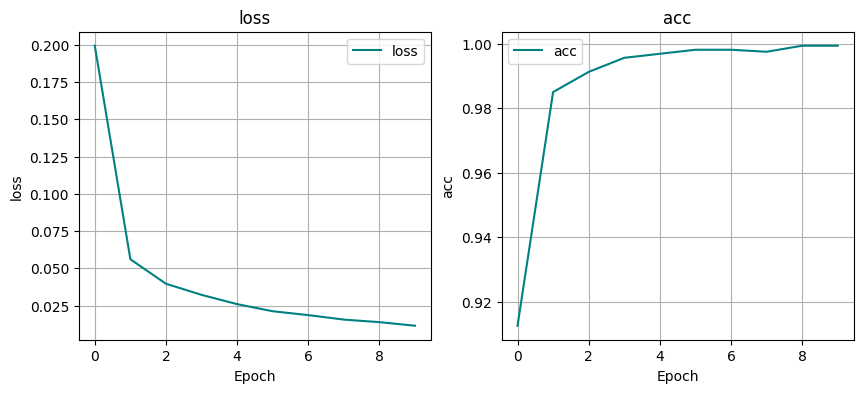

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
for idx, metric in enumerate(history_list):
  ax[idx].plot(hist.history[metric], color='teal', label=metric)
  ax[idx].set_title(metric)
  ax[idx].set_xlabel('Epoch')
  ax[idx].set_ylabel(metric)
  ax[idx].grid(True)
  ax[idx].legend()
plt.show()

In [ ]:
score, acc = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss = {score}")
print(f"Test Accuracy = {acc}")

13/13 [==============================] - 2s 105ms/step - loss: 0.0940 - acc: 0.9625
Test Loss = 0.09400401264429092
Test Accuracy = 0.9624999761581421


# Predictive System

Path of the image to be predicted: /content/drive/MyDrive/Python and Machine Learning Practice/End to End ML Practice/Dog and Cat Image Classification (Transfer Learning)/Test_c.jpg


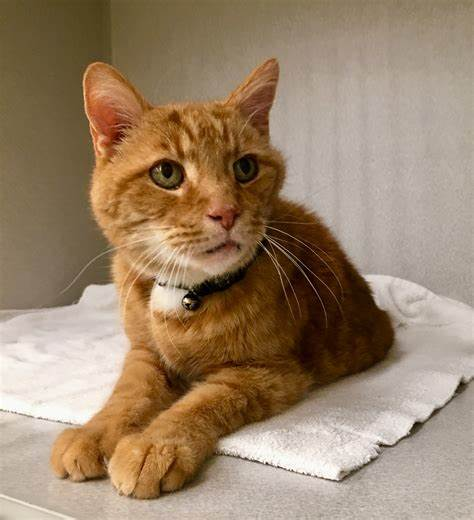

1/1 [==============================] - 2s 2s/step
The image is classifed as a Cat


In [ ]:
input_image_path = input("Path of the image to be predicted: ")
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image, (224,224))
input_image_scaled = input_image_resize/225
image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
  print('The image is classifed as a Cat')
else:
  print('The image is classifed as a Dog')

Path of the image to be predicted: /content/drive/MyDrive/Python and Machine Learning Practice/End to End ML Practice/Dog and Cat Image Classification (Transfer Learning)/Test_d.jpg


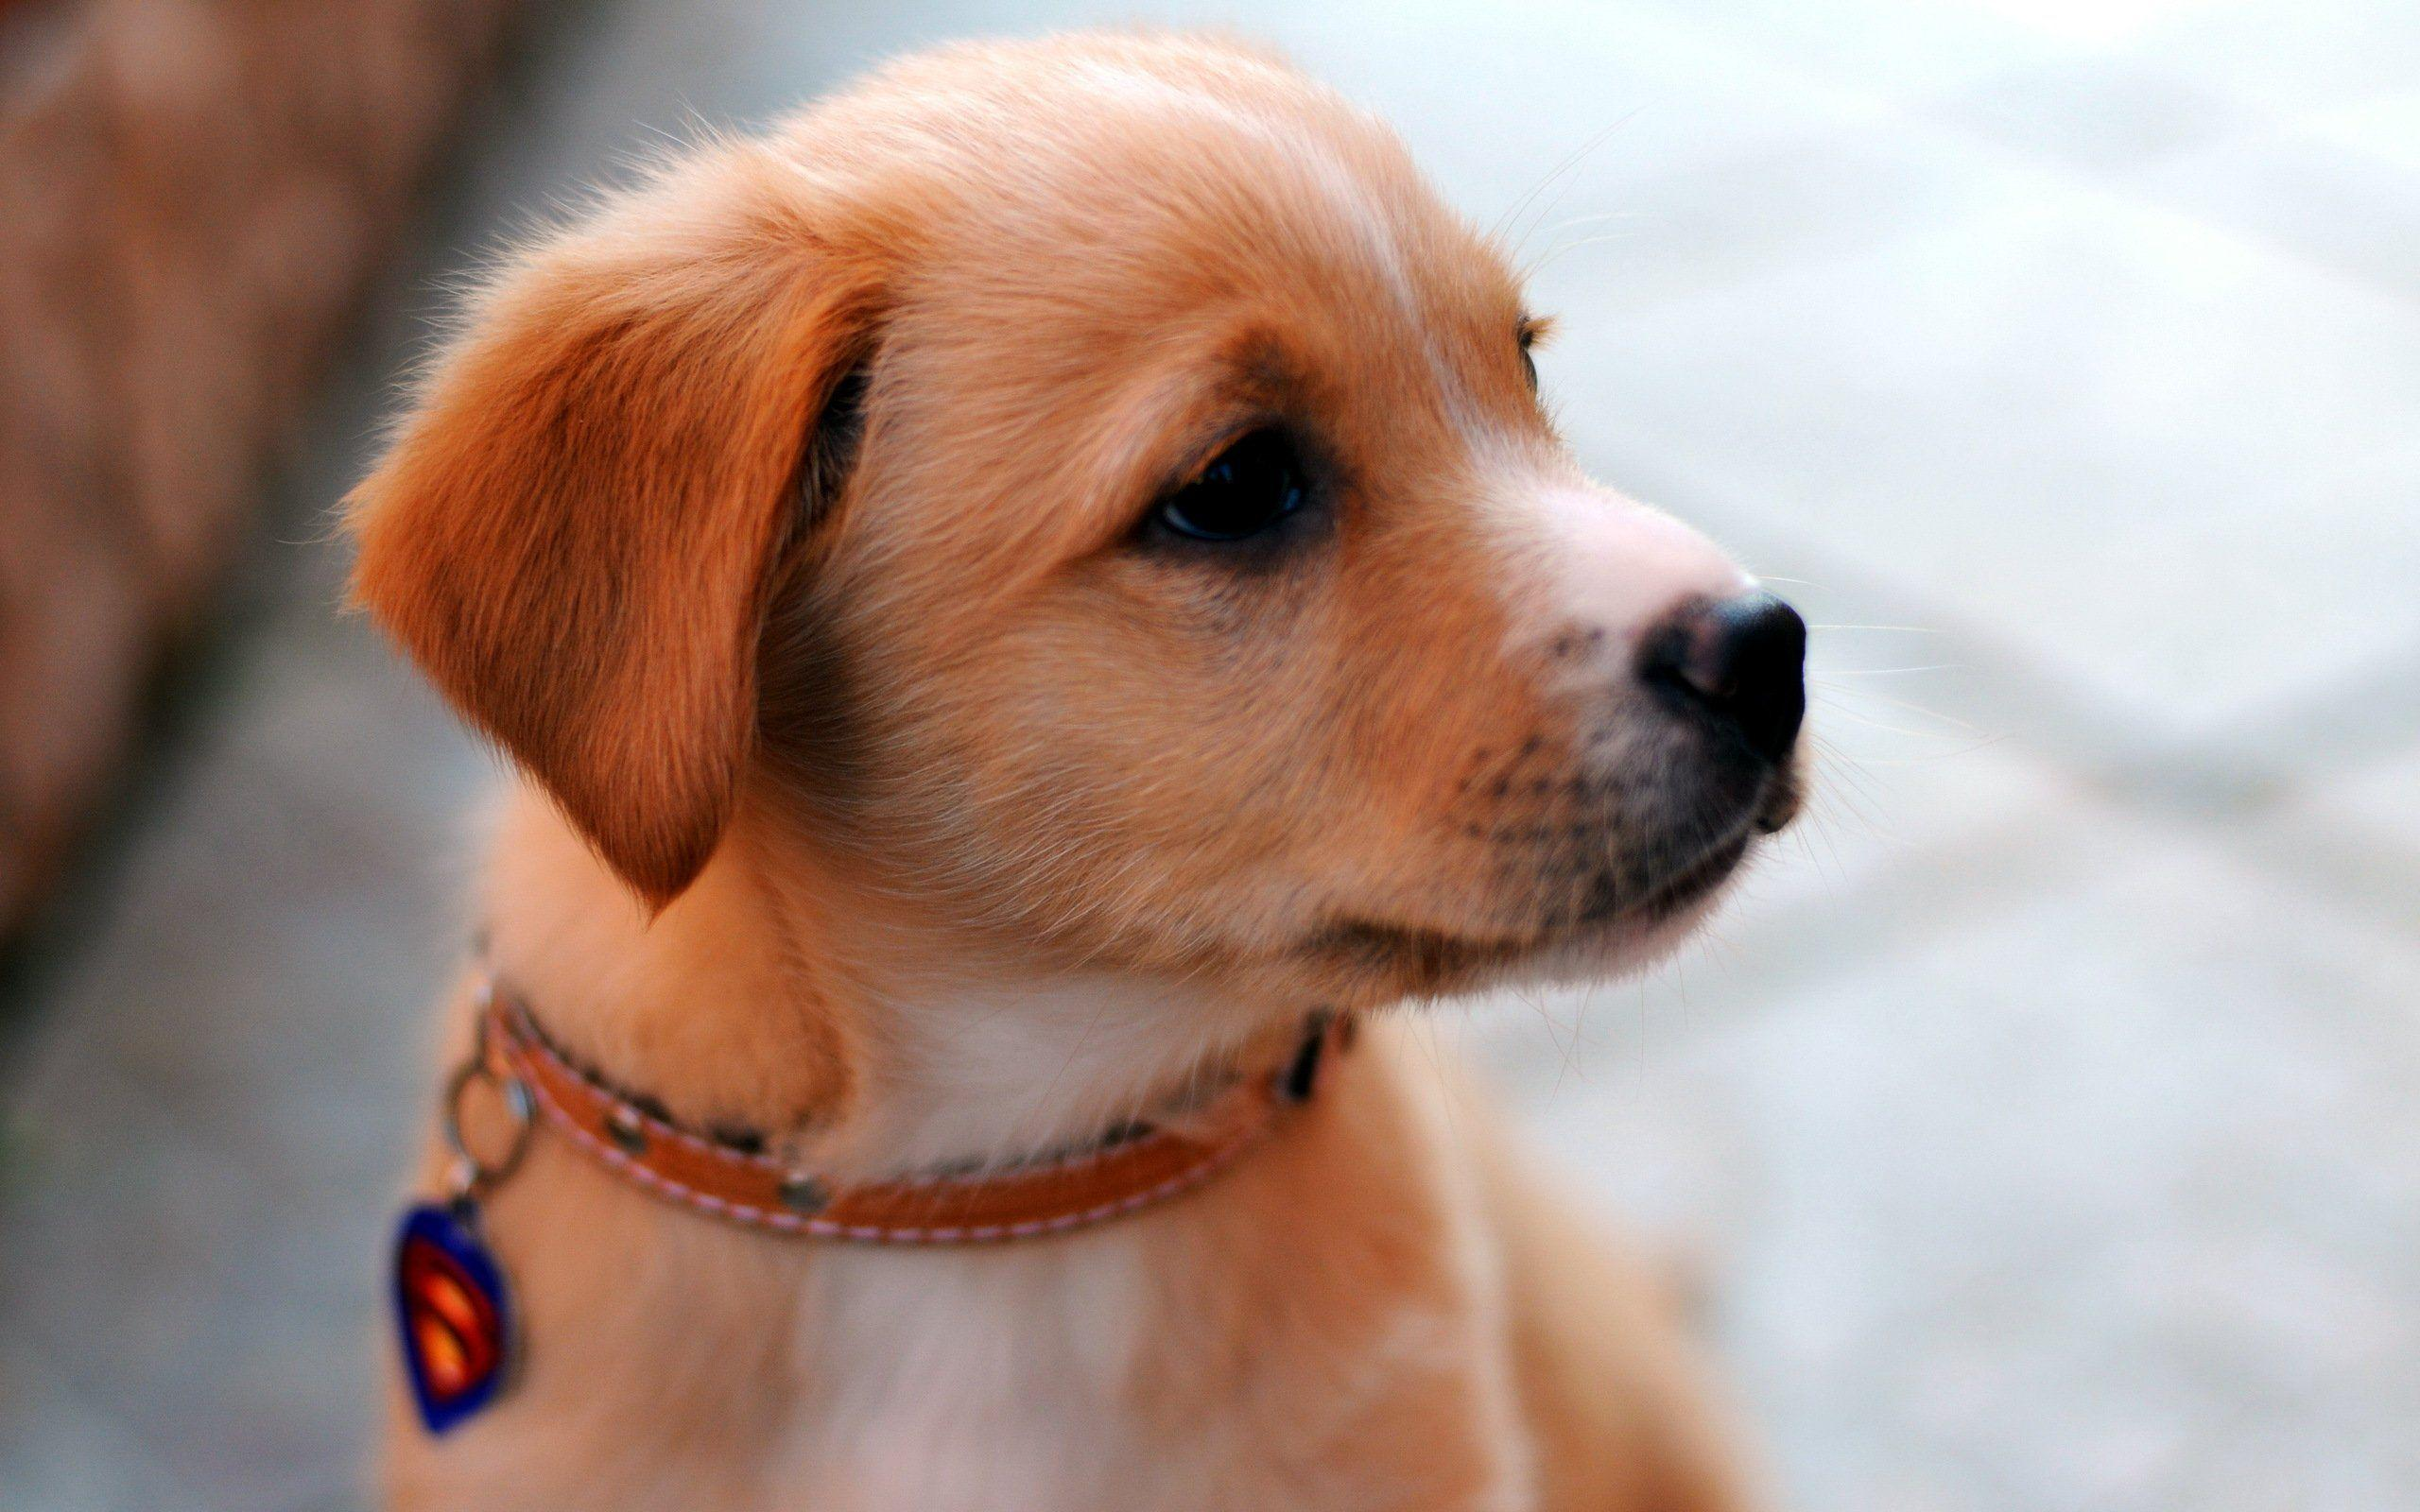

1/1 [==============================] - 0s 42ms/step
The image is classifed as a Dog


In [ ]:
input_image_path = input("Path of the image to be predicted: ")
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image, (224,224))
input_image_scaled = input_image_resize/225
image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
  print('The image is classifed as a Cat')
else:
  print('The image is classifed as a Dog')